1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

l_svd: [2.61179135e+01 2.08307642e+00 7.48481380e-30]
l: [ 2.61177713e+01  2.08200559e+00 -2.05401579e-15]

V:
 [[-0.12080854  0.56456942 -0.81649658]
 [-0.57064496 -0.71252906 -0.40824829]
 [-0.81226204  0.41660978  0.40824829]]
V_svd:
 [[-0.12081771  0.56456746 -0.81649658]
 [-0.57063339 -0.71253833 -0.40824829]
 [-0.81226881  0.41659659  0.40824829]]

V.shape: (3, 3)

They are not exactly the same, but the difference is very small (also in the case of the last eigenvalue)
Indeed, it is almost zero in both cases

Lambda:
 [[ 2.61177713e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.08200559e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.05401579e-15]]

Variability by considering only the first component: 0.9261694303349991
Variability with the two largest components (the first and the second): 1.0000000000000002

Ap:
 [[  0.65876714   4.12915518  -4.56347315 ...   7.63083845   2.23577158
  -11.3696937 ]
 [  0.60128871   2.09358021   0.0523636  ...  -3.34703929  

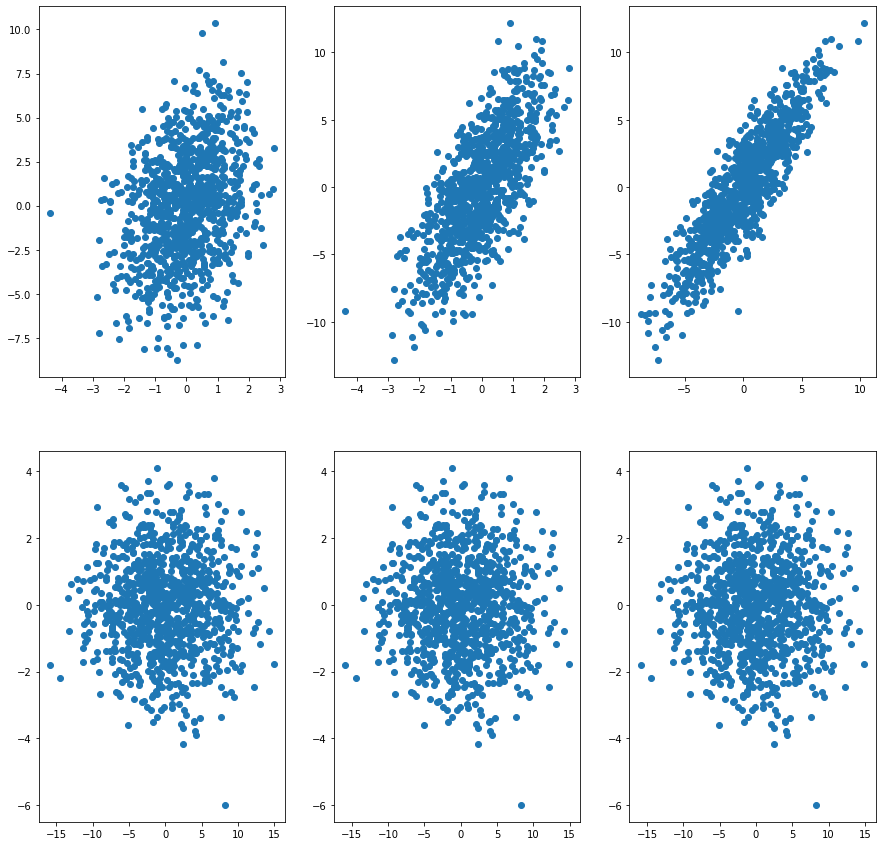

In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

N = 1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2

A = np.array([x1,x2,x3])   #each feature is a row of the matrix A

C = np.cov(A)
l, V = la.eig(C)
l = np.real_if_close(l)

# The eigenvalues are not ordered in decreasing order, so a swap is performed
# Of course, the corresponding swap must be performed also for the eigenvectors
l[1], l[2] = l[2], l[1]
V[:,[1,2]] = V[:,[2,1]]

U, S, Vt = la.svd(A)
l_svd = S**2/(N-1)
V_svd = U

print("l_svd:", l_svd)
print("l:", l)

print("\nV:\n", V)
print("V_svd:\n", V_svd)

print("\nV.shape:", V.shape)

print("\nThey are not exactly the same, but the difference is very small (also in the case of the last eigenvalue)")
print("Indeed, it is almost zero in both cases")

Lambda = np.diag(l)
print("\nLambda:\n", Lambda)
print("\nVariability by considering only the first component:", Lambda[0,0]/Lambda.trace())  #not enough to reach the 99% 
print("Variability with the two largest components (the first and the second):", (Lambda[0,0] + Lambda[1,1])/Lambda.trace())

#The first component is the one with the largest variability, that is expected since it is independent from the 
#other two variables

#The second one has a small variability, since it strongly depends on x1

#The variability of the third one is zero, and also this result was expected because it can be written as
#a linear combination of the other two variables, so it doesn't carry any information

#So the last eigenvalue is set to zero (even if it's already very small)

Vp = V
Vp[:,2] = 0
Ap = np.dot(Vp.T, A)
print("\nAp:\n", Ap)

fig, ax = plt.subplots(2,3,figsize=(15,15))
ax[0,0].scatter(A[0,:], A[1,:])
ax[0,1].scatter(A[0,:], A[2,:])
ax[0,2].scatter(A[1,:], A[2,:])
ax[1,0].scatter(Ap[0,:], Ap[1,:])
ax[1,1].scatter(Ap[0,:], Ap[1,:])
ax[1,2].scatter(Ap[0,:], Ap[1,:])
plt.show()


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [2]:
for i in range(10):
    noise = np.random.normal(loc=0, scale=1/20, size=N)
    A = np.vstack((A,noise))

C = np.cov(A)
l, V = la.eig(C)
l = np.real_if_close(l)
#as before, eigenvalues are not sorted

indexes_increasing = np.argsort(l)   #this returns the indexes to sort in increasing order
indexes_decreasing = indexes_increasing[::-1]   #I need to sort in decreasing order so i take the reversed array
l = l[indexes_decreasing]

#the eigenvectors must be reordered accordingly
V = V[:,indexes_decreasing]

U, S, Vt = la.svd(A)
l_svd = S**2/(N-1)
V_svd = U

Lambda = np.diag(l)

print("\nVariability by considering only the first component:", Lambda[0,0]/Lambda.trace())  #not enough to reach the 99% 
print("Variability with the two largest components:", (Lambda[0,0] + Lambda[1,1])/Lambda.trace(), "\n")

#as before, almost the 93% of the total variability is related to the first principal component
#if we consider also the second we retain the 100% of the variability (99,9%)

#The variability of all the other components is of course very low:
for i in range(1,13):
    print("Variability by considering only the", i+1, "° component:", Lambda[i,i]/Lambda.trace())  #not enough to reach the 99% 

Vp = V
Vp[:, np.arange(2,13)] = 0
Ap = np.dot(Vp.T, A)


Variability by considering only the first component: 0.925364356936583
Variability with the two largest components: 0.9991314522047738 

Variability by considering only the 2 ° component: 0.07376709526819084
Variability by considering only the 3 ° component: 0.00010249351703618113
Variability by considering only the 4 ° component: 9.830885745470173e-05
Variability by considering only the 5 ° component: 9.443930188890055e-05
Variability by considering only the 6 ° component: 9.065730041834951e-05
Variability by considering only the 7 ° component: 8.850056594692033e-05
Variability by considering only the 8 ° component: 8.519857519562612e-05
Variability by considering only the 9 ° component: 8.02248101613831e-05
Variability by considering only the 10 ° component: 7.76608401298417e-05
Variability by considering only the 11 ° component: 7.733745876858698e-05
Variability by considering only the 12 ° component: 7.372656822582889e-05
Variability by considering only the 13 ° component: 8.06563

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 